In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

d:\visualization\visualization-env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


ModuleNotFoundError: No module named 'certifi'

In [20]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [8]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

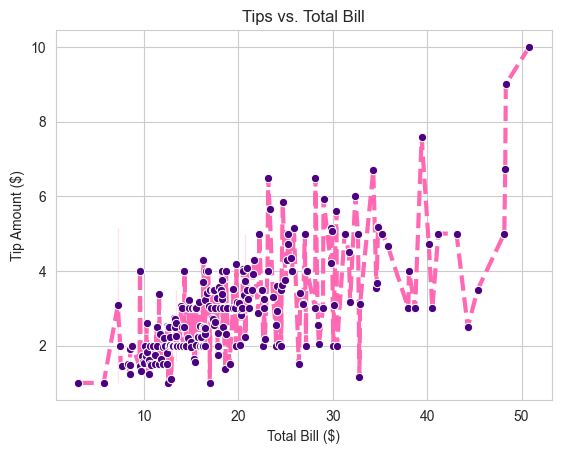

In [14]:
sns.set_style('whitegrid')
tipgraph=sns.lineplot(data=tips, # choose our dataset
             x='total_bill', # define our x variable
             color='hotpink',
             linestyle='--',
             linewidth=3,
             marker='o',
             markerfacecolor='indigo',
             y='tip') # define our y variable

tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

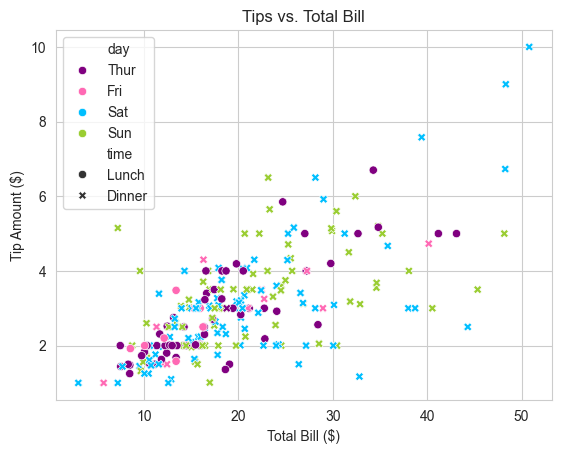

In [16]:
tipgraph = sns.scatterplot(data=tips, x='total_bill',
                           y='tip', 
                           style = 'time', 
                           hue ='day',
                           palette = ['purple','hotpink', 'deepskyblue','yellowgreen'])
tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

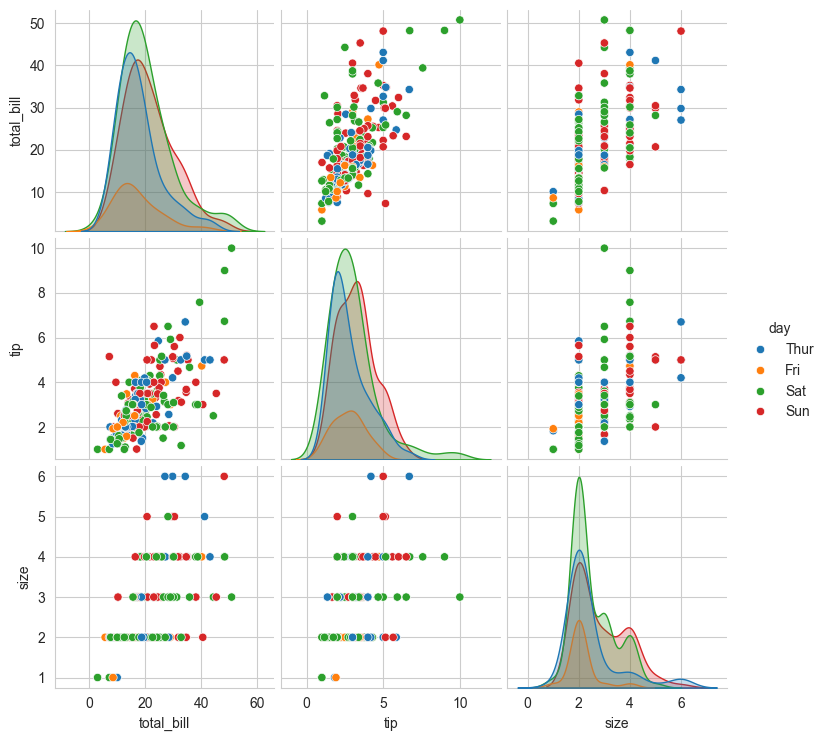

In [23]:
sns.pairplot(data = tips,
    hue = 'day')

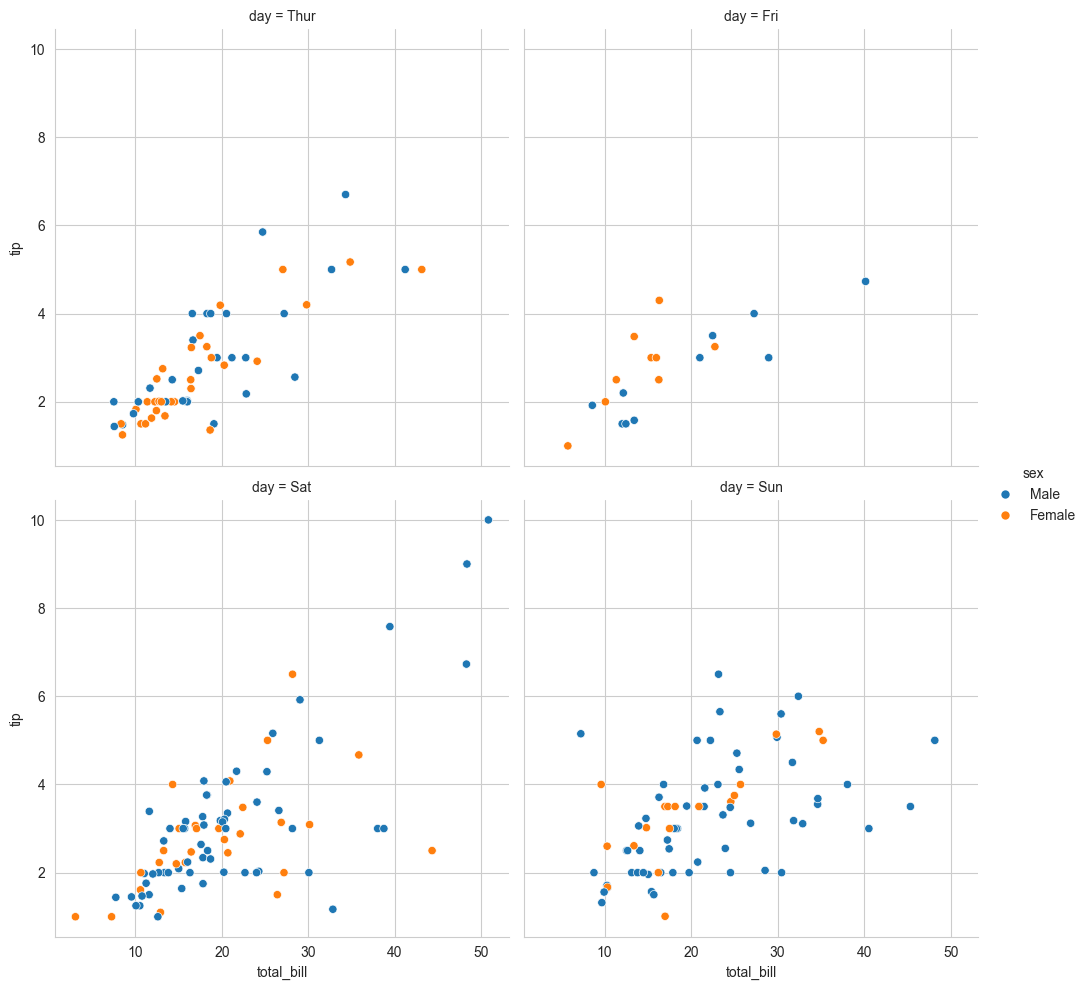

In [24]:
daysplot = sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex",
    col="day",
    kind="scatter",
    col_wrap=2)

In [25]:
import plotly.graph_objects as go # 'go' is 'graph objects’
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

ModuleNotFoundError: No module named 'plotly'

In [ ]:
graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1))
graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score")


NameError: name 'go' is not defined

In [30]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers', # we want points for a scatter plot
    marker=dict(
        size=15,   # point size
        color='hotpink', # point colour
        opacity=1, # point transparency/alpha
        line=dict(width=5, color='purple') # point outline
)))

graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500)

NameError: name 'go' is not defined

In [31]:
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
df

ModuleNotFoundError: No module named 'wordcloud'